# Um breve tour do Fatiando a Terra

In [15]:
import fatiando

In [16]:
print(fatiando.__version__)

3c4953c170e1e9d964325ccd133a5ef28e319e89


## Criando formas geométricas

In [1]:
from fatiando import mesher

In [3]:
prisma = mesher.Prism(1, 5, 9, 29, 0, 3)

In [4]:
prisma

In [5]:
prisma.get_bounds()

[1.0, 5.0, 9.0, 29.0, 0.0, 3.0]

In [6]:
prisma.addprop('density', 250)

In [7]:
prisma.props

{'density': 250}

In [8]:
from fatiando.vis import myv

In [9]:
myv.figure()
myv.prisms([prisma])
myv.show()

In [10]:
modelo = [prisma, mesher.Prism(10, 15, 2, 5, 5, 10, {'density': -250})]

In [11]:
myv.figure()
myv.prisms(modelo, 'density')
myv.show()

In [14]:
myv.figure()
myv.prisms(modelo, 'density')
bounds = [0, 20, 0, 30, 0, 20]
myv.outline(bounds)
myv.wall_north(bounds)
myv.show()

## Modelagem direta

In [17]:
from fatiando import gridder

In [18]:
x, y = gridder.regular(bounds[:4], (50, 50))

In [20]:
x, y

(array([  0.,   0.,   0., ...,  20.,  20.,  20.]),
 array([  0.       ,   0.6122449,   1.2244898, ...,  28.7755102,
         29.3877551,  30.       ]))

In [21]:
import numpy as np

In [22]:
z = np.zeros_like(x)

In [23]:
z

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [24]:
from fatiando.gravmag import prism

In [25]:
grav = prism.gz(x, y, z, modelo)

In [26]:
grav

array([ -1.33961301e-04,  -1.20752358e-04,  -1.01987074e-04, ...,
         3.49127388e-05,   3.48324638e-05,   3.45110474e-05])

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/leo/bin/anaconda/envs/iag/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


<matplotlib.tri.tricontour.TriContourSet instance at 0x7f4db98cc320>

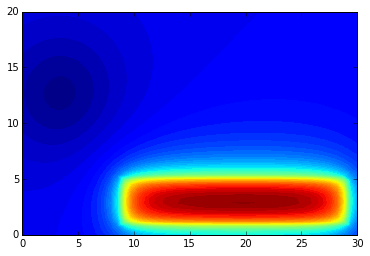

In [28]:
plt.tricontourf(y, x, grav, 60)

## Desafio: modelo de prismas da topografia

In [71]:
x, y, topo = np.loadtxt('topografia.txt', unpack=True)

In [72]:
dx = (x.max() - x.min())/(20 - 1)
dy = (y.max() - y.min())/(20 - 1)

In [73]:
dx, dy

(745.97000000000264, 982.8894736841811)

In [74]:
modelo = []
for i in xrange(len(x)):
    prisma = mesher.Prism(x[i] - dx/2, x[i] + dx/2,
                          y[i] - dy/2, y[i] + dy/2,
                          0, -topo[i])
    modelo.append(prisma)

In [75]:
myv.figure()
myv.prisms(modelo)
myv.show()